# Task 1



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tkinter as tk
from tkinter import Label, Entry, Radiobutton, Button
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import seaborn as sn

# Loading Data

## Overview
this function loading data from text file and split them to training and testing set.
there are 50 example for each of 3 classes we can shuffle each f these classes separately and 
combine these traninig example in X_training and testing examples in X_testing
there 2 options for loading data:
1. loading all data (3 classes and 4 features)
1. loading specific 2 classes and specific 2 features then split them into training and testing sets.

***

## Parameters
features -> this is a Dictionary which is passed in case of loading a specific feautures
            it contains the chosen features indices
            
classes -> this is a Dictionary which is passed in case of loading a specific classes
            it contains the chosen classes indices
       
all_data -> Boolean which acts as a flag to discriminate between the 2 options


In [2]:
def load_data(features=None, classes=None, all_data=False):
    
    file_name = "IrisData.txt"
    df = pd.read_csv(file_name)
    

    if all_data:
        
        Map = {"Iris-setosa":0,
      "Iris-versicolor":1,
      "Iris-virginica":2}
        
        X = df.iloc[:, 0:4].values
        Y = df.iloc[:, 4].values
        Y = [Map[x] for x in Y]
        Y = np.asarray(Y, dtype=np.float32)
        Y = Y[:, np.newaxis]
        return X, Y
        
    
    c1, c2 = classes
    x1, x2 = features
    
    indices1 = np.arange(50*c1, (c1+1)*50) 
    indices2 = np.arange(50*c2, 50*(c2+1))
    
    X = df.iloc[:, [x1, x2]].values

    Y = np.ones((50, 1))
    X1_training, X1_testing, Y1_training, Y1_testing = train_test_split(X[indices1, :], Y, test_size=0.4, random_state=0)
    Y[:,:] = -1
    X2_training, X2_testing, Y2_training, Y2_testing = train_test_split(X[indices2, :], Y, test_size=0.4, random_state=0)
    
    X_training = np.concatenate((X1_training, X2_training), axis=0)
    X_testing = np.concatenate((X1_testing, X2_testing), axis=0)
    
    Y_training = np.concatenate((Y1_training, Y2_training), axis=0)
    Y_testing = np.concatenate((Y1_testing, Y2_testing), axis=0)
    
    X_training, Y_training = shuffle(X_training, Y_training, random_state=0)
    X_testing, Y_testing = shuffle(X_testing, Y_testing)
    
    return X_training, X_testing, Y_training, Y_testing

# `Plot`

## Overview
this function is ploating the data to show it in the plan it takes a specific 2 features and draw the plane
by coloring each class with a different color to notice correlation between data.

***

## Parameters
X1 -> its a numpy array which has a (150, 1) dimension that means 1 feature for 150 example.
X2 -> it's also numpy array with the same dimension as x1 but contains different feature.

In [3]:
def plot(X1, X2):
    plt.figure('fig1')
    plt.scatter(X1[:50], X2[:50], color='red')
    plt.scatter(X1[50:100], X2[50:100], color='green')
    plt.scatter(X1[100:150], X2[100:150], color='blue')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# `Signum`

## Overview
this function apply the <b>non linearty</b> to the output which called activation function 
if x>0 then y = 1
if x<0 the y = -1
if x=0 the y = 0

***

# Parameters
X -> numpy array which is the output of the perceptron in the training phase and the prediction 

In [4]:
def signum(X):
    X[X>0] = 1
    X[X<0] = -1 
    return X

# `Train`

## Overview
- this function takes training examples by which the perceptron will learn from it.
- our aim from learning the neuron is to find an equation that can split 2 different classes.

***

## Algorithm steps

1. randomly inializing the equation coffecients and the biase.
1. calculate the predction labels
1. apply activation function `signum`
1. finally update weights.

***

## Parameters

- `X_training` the training data each example represented in one row ,the **dimension = (60, 2)**
- `Y_training` the labels for the each example, the **dimension = (60, 1)**
- `alpha` the learning rate it used when updating the weights and should neither very small nor very big
- `num_of_epochs` the number of iteration for training scope and updating the weights
- `add_biase` boolean flage to add biase or not.

<div class="alert alert-block alert-warning">
    <b>Note:</b> if  <b>add_biase</b> is False the line which split the data will pass through the origin and can't be shifted 
</div>



In [5]:
def train(X_training, Y_training, alpha, num_of_epochs, add_biase):
    W = np.random.randn(3, 1)
    if add_biase == True:
        X_training =  np.insert(X_training, 0, 1, axis=1)
    else:
        tmp = X_training
        W[0,0] = 0
        X_training = np.zeros((60, 3))
        X_training [:, 1:3] = tmp
        
    
    for i in range(num_of_epochs):
        Y_pred = np.dot(X_training, W)
        Y_pred = signum(Y_pred)
        Loss = np.subtract(Y_training, Y_pred) #(60, 1)
        W = W + np.dot(X_training.T ,(alpha * Loss)) #(3, 60) * (60, 1)
    
    '''for i in range (num_of_epochs):
        for x in range(60):
            y_pred = signum(np.dot(X_training[x, :], W))
            if y_pred != Y_training[x, 0]:
                L = Y_training[x, 0] - y_pred #Loss
                K = X_training[x, :]
                K = K[:,np.newaxis]
                W = W + alpha*(L * K )'''
            
    return W

# get_testing_predictions

## Overview
after training the neuron and get the line coffecients we need to test our model to know how well is that line do
so, our startegy was splitting the data we are collected and take 60% for training and 40% for test the model.
after that we can compare the predicted labels with the original labels and calculate the accuray of that model.

***

## Parameters

1. `X-testing` the tetsing data **dimension = (40, 2)**
1. `Y_testing` the correct labels of the X_testing **dimension = (40, 1)**
1. `W` the line coffecients **dimenstion = (3, 1)**

In [6]:
def get_testing_predictions(X_testing, Y_testing, W):
    '''
        X_Testing shape(40, 2)
        adding biase parameter
    '''
    tmp = np.ones((40, 3))
    tmp[:, 1:3] = X_testing
    Y_pred = np.dot(tmp, W)
    Y_pred = signum(Y_pred)
    return Y_pred

# `Plot_confusion_matrix`

## Overview

after training the model and passing the test set to calculate the accuracy we may need to know some statistics about the behaviour of the model. confusion matrix represents the recall and perecion of the model which means how many the model predict class 1 correctly and how many classify it wrongly and the same for class 2.

***

## Parametrs

1. `Y_testing` the correct labels for testing set **dimension = (40, 1)**
1. `Y_pred` the output model prediction for testing set **dimension = (40, 1)**

In [7]:
def plot_confusion_matrix(Y_testing, Y_pred):
    
    result = confusion_matrix(Y_testing, Y_pred)
    
    df_cm = pd.DataFrame(result, range(2),
                  range(2))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    

In [12]:
def plot_line(X_training, Y_training, W):
    
    X_training =  np.insert(X_training, 0, 1, axis=1)
    
    minn = min(X_training[:, 1])
    maxx = max(X_training[:, 1])
    x = [minn, maxx]
    y = [(-W[0, 0]-W[1, 0]*minn)/W[2, 0], (-W[0, 0]-W[1, 0]*maxx)/W[2, 0]]
    l1 =[]
    l2 =[]
    l3 =[]
    l4 =[]

    for i in range(40):
        if Y_training[i] == 1:
            l1.append(X_training[i, 1])
            l2.append(X_training[i, 2])
        else:
            l3.append(X_training[i, 1])
            l4.append(X_training[i, 2])

    plt.plot(x, y)
    plt.scatter(l1, l2, color='green')
    plt.scatter(l3, l4, color='blue')
    
    plt.show()

# `start_learning`

## Overview

this function is called when the user choose the features he need by which to train the model,
classes that he need to classify among them , learning rate and number of training iterations.

<div class="alert alert-block alert-info">
    <b>Tip:</b> this function is called when the user click in the <b>train</b> button and it will call the previous function 
</div>

In [9]:
def start_learning():
    features = [int(f1_entry.get()), int(f2_entry.get())]
    classes = [int(c1_entry.get()), int(c2_entry.get())]
    X_training, X_testing, Y_training, Y_testing = load_data(features=features, classes=classes)

    add_biase = True if var.get()==0 else False
    
    W = train(X_training, Y_training,
          alpha=float(eta_entry.get()),
          num_of_epochs=int(epochs_entry.get()),
              add_biase=add_biase)
    
    Y_pred = get_testing_predictions(X_testing, Y_testing, W)
    accuracy = accuracy_score(Y_testing, Y_pred)
    print('total all accuracy = ' + str(accuracy))
    #plot_confusion_matrix(Y_testing, Y_pred)
    
    plot_line(X_testing, Y_testing, W)
    

# `GUI`

total all accuracy = 0.975


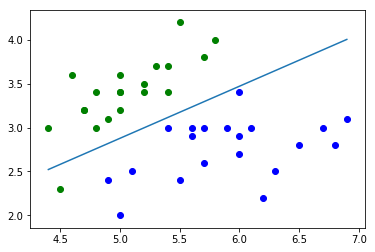

In [ ]:
root = tk.Tk()
#root.geometry("350x200")



f1_label = tk.Label(root, text='Feature 1', padx=10).grid(row=0)

f2_label = tk.Label(root, text='Feature 2', padx=10).grid(row=5)

c1_label = tk.Label(root, text='Class 1', padx=10).grid(row=10)

c2_label = tk.Label(root, text='Class 2', padx=10).grid(row=15)

eta_label = tk.Label(root, text='learning Rate', padx=10).grid(row=20)

epochs_label = tk.Label(root, text='Num Of Epochs', padx=10).grid(row=25)

bias_label = tk.Label(root, text="add biase", padx=10).grid(row=30)

f1_entry = Entry(root)
f2_entry = Entry(root)

c1_entry = Entry(root)
c2_entry = Entry(root)

eta_entry = Entry(root)
epochs_entry = Entry(root)

f1_entry.grid(row=0, column=4)
f2_entry.grid(row=5, column=4)

c1_entry.grid(row=10, column=4)
c2_entry.grid(row=15, column=4)

eta_entry.grid(row=20, column=4)
epochs_entry.grid(row=25, column=4)

var = tk.IntVar()
var.set(0)


Radiobutton(root, text="yes", variable=var, value=0).grid(row=30, column=1)
Radiobutton(root, text="no", variable=var, value=1).grid(row=30, column=4)

submit = tk.Button(root, 
                   text="train", 
                   fg="red",
                   command=start_learning).grid(row=50, column=3)



root.mainloop()

# `ploting all data`

after loading data we need to visualize our data to know which features are discriminative

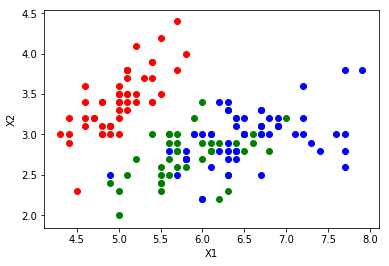

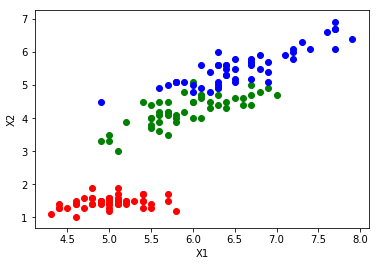

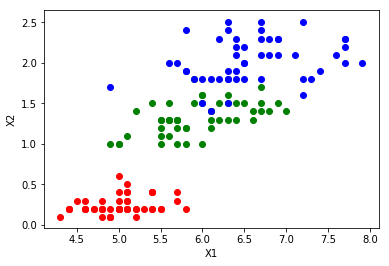

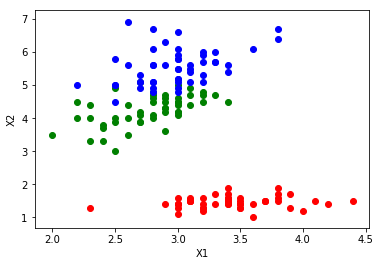

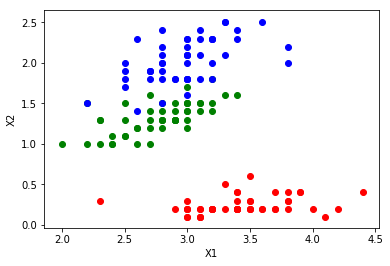

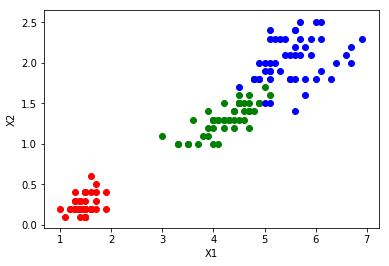

In [11]:
X, Y = load_data(all_data=True)
plot(X[:,0], X[:,1])
plot(X[:,0], X[:,2])
plot(X[:,0], X[:,3])
plot(X[:,1], X[:,2])
plot(X[:,1], X[:,3])
plot(X[:,2], X[:,3])